<a href="https://colab.research.google.com/github/IlyaZutler/Project_2-Trucks/blob/main/DM%20_%20Project_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic mitochondria Project - Heavy Machinery Auction Price Estimator

> https://www.kaggle.com/t/9baafb8850d74e4499c7b1ba97d6f115

### Timeline
- **Start Date:** [Start Date]
- **End Date:** 14/07/2024 (11 days to go)

### 2. Exploratory Data Analysis (EDA)


### 3. Data Preprocessing

### 6. Model Improvement

- Handle missing values and categorical variables more effectively.
- Use feature importances to identify key features.
- Perform feature engineering to create new informative features.
- Tune hyperparameters using grid search or other techniques.
- Monitor for overfitting by comparing training and testing performance.

## Practical Data Science Guidelines

- **Efficient Workflows:** Use a random subset of 20,000 rows for initial experiments. Use the full dataset for the final submission.
- **Iterative Approach:** Start with a basic model and iteratively improve it by trying small ideas.
- **Feature Engineering:** Transform and combine existing features creatively.
- **Documentation:** Keep track of your experiments and results. Document what works and what doesn't.

## Collaboration and Presentation

- **Collaboration:** Discuss your work openly within your team or with other teams. Sharing insights and learning from each other is encouraged.
- **Presentation:** Present your methodology, results, and the techniques that helped the most. Document your journey and the steps you took to achieve your results



In [1]:
import gdown
from pathlib import Path

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer


In [2]:
def download_from_gdrive(url, filename):
    # Extract the file ID from the URL
    file_id = url.split('/')[-2]
    download_url = f"https://drive.google.com/uc?id={file_id}"

    # Download the file
    if Path(filename).exists():
        print(f"File '{filename}' already exists. Skipping download.")
    else:
        gdown.download(download_url, filename, quiet=False)
        print(f"File downloaded as: {filename}")

train = 'https://drive.google.com/file/d/1guqSpDv1Q7ZZjSbXMYGbrTvGns0VCyU5/view?usp=drive_link'
valid = 'https://drive.google.com/file/d/1j7x8xhMimKbvW62D-XeDfuRyj9ia636q/view?usp=drive_link'
# Example usage

download_from_gdrive(train, 'train.csv')
download_from_gdrive(valid, 'valid.csv')

df = pd.read_csv('train.csv')
df_valid = pd.read_csv('valid.csv')

File 'train.csv' already exists. Skipping download.
File 'valid.csv' already exists. Skipping download.


<ipython-input-2-861d4f7287ed>:20: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


## Exploratory Data Analysis (EDA)

In [ ]:
#df.fiProductClassDesc.value_counts()

In [ ]:
#df.info()

In [ ]:
 #df.SalesID.nunique()

In [ ]:
# df.isnull().sum()

In [ ]:
#df.describe()

In [ ]:
#sns.histplot(data=df, x='SalePrice', bins=20)

In [4]:
# to see value_counts for all categorical columns, but some realy categorical columns has numerical type like ModelID
categorical_cols = df.select_dtypes(exclude='number').columns
for col in categorical_cols:
  print(f"Value counts for column '{col}':")
  print(df[col].value_counts())
  print(f"NaN values:{df[col].isnull().sum()}")
  print()

Value counts for column 'UsageBand':
UsageBand
Medium    33985
Low       23620
High      12034
Name: count, dtype: int64
NaN values:331486

Value counts for column 'saledate':
saledate
2/16/2009 0:00    1932
2/15/2011 0:00    1352
2/19/2008 0:00    1300
2/15/2010 0:00    1219
2/11/2008 0:00    1100
                  ... 
1/16/2004 0:00       1
3/27/2006 0:00       1
7/25/2003 0:00       1
1/16/2006 0:00       1
6/9/2008 0:00        1
Name: count, Length: 3919, dtype: int64
NaN values:0

Value counts for column 'fiModelDesc':
fiModelDesc
310G        5039
416C        4869
580K        4315
310E        4233
140G        4083
            ... 
EX210-5        1
KX025          1
EX120-5F       1
EX100-5E       1
HW180          1
Name: count, Length: 4999, dtype: int64
NaN values:0

Value counts for column 'fiBaseModel':
fiBaseModel
580      19798
310      17354
D6       13110
416      12687
D5        9342
         ...  
830-2        1
272          1
PC230        1
KBD65        1
HW180        1


### 3. Data Preprocessing

In [3]:
def Num_to_Object(X, col):
    for col_ in col:
        X[col] = X[col].astype('object')
    return X

df = Num_to_Object(df, col = ['datasource'])
df_valid = Num_to_Object(df_valid, col = ['datasource'])

In [4]:
def fix_mistakes(X, replacement_dict):
    for col, replacements in replacement_dict.items():
        X[col] = X[col].replace(replacements)
    return X

fix_mistakes(df, replacement_dict = {'Transmission': {'AutoShift': 'Autoshift'}})
fix_mistakes(df_valid, replacement_dict = {'Transmission': {'AutoShift': 'Autoshift'}})
#df['Transmission'] = df['Transmission'].replace('AutoShift', 'Autoshift')

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,1/5/2012 0:00,375L,375,NaN,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 66.0 to 90.0 Metr...",Kentucky,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,1/5/2012 0:00,TX300LC2,TX300,LC,2,NaN,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,Hydraulic,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,1/5/2012 0:00,270LC,270,NaN,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 24.0 to 28.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,1/5/2012 0:00,892DLC,892,D,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,1/4/2012 0:00,544H,544,H,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,6333344,1919201,21435,149,2,2005,NaN,NaN,3/7/2012 0:00,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11569,6333345,1882122,21436,149,2,2005,NaN,NaN,1/28/2012 0:00,30NX2,30,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11570,6333347,1944213,21435,149,2,2005,NaN,NaN,1/28/2012 0:00,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11571,6333348,1794518,21435

In [5]:
def fix_data(X, date_col):
    for col in date_col:
        X[col] = pd.to_datetime(X[col])
        X[col + '_Year'] = X[col].dt.year
        X[col + '_Month'] = X[col].dt.month
        X = X.drop(col, axis=1)
    return X

df = fix_data(df, date_col = ['saledate'])
df_valid = fix_data(df_valid, date_col = ['saledate'])

In [6]:
def first_word_name(X, col):
    for col_ in col:
        X[col_+'_first_word'] = X[col_].apply(lambda x: x.split()[0] if isinstance(x, str) else x)
    return X

first_word_name(df, col = ['fiProductClassDesc'])
first_word_name(df_valid, col = ['fiProductClassDesc'])

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saledate_Year,saledate_Month,fiProductClassDesc_first_word
0,1222837,902859,1376,121,3,1000,0.0,NaN,375L,375,NaN,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 66.0 to 90.0 Metr...",Kentucky,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,1,Hydraulic
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,TX300LC2,TX300,LC,2,NaN,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,Hydraulic,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN,2012,1,Hydraulic
2,1222841,999308,4587,121,3,2000,10127.0,Medium,270LC,270,NaN,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 24.0 to 28.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,1,Hydraulic
3,1222843,1062425,1954,121,3,1000,4682.0,Low,892DLC,892,D,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,1,Hydraulic
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,544H,544,H,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2012,1,Wheel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,6333344,1919201,21435,149,2,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,3,Hydraulic
11569,6333345,1882122,21436,149,2,2005,NaN,NaN,30NX2,30,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,1,Hydraulic
11570,6333347,1944213,21435,149,2,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspeci

In [7]:
def ord_encod_nan(X, col, categories):
    encoder = OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value= -1)
    X[col + '_3'] = encoder.fit_transform(X[[col]])
    X[col + '_3'].replace(-1, np.nan, inplace=True)
    X[col + '_3'] = pd.to_numeric(X[col + '_3'], errors='coerce')
    X[col + '_3'] = X[col + '_3'].astype('float')

    return X


df = ord_encod_nan(df, col = 'UsageBand', categories = ['Low', 'Medium', 'High'])
df_valid = ord_encod_nan(df_valid, col = 'UsageBand', categories = ['Low', 'Medium', 'High'])

df = ord_encod_nan(df, col = 'ProductSize', categories = ['Mini', 'Compact', 'Small', 'Medium', 'Large / Medium', 'Large', 'High'])
df_valid = ord_encod_nan(df_valid, col = 'ProductSize', categories = ['Mini', 'Compact', 'Small', 'Medium', 'Large / Medium', 'Large', 'High'])

In [8]:
def replace_dict(X, col, repl_dict):
    new_name = col + '_3'

    X[new_name] = X[col]
    for old, new in repl_dict.items():
        X[new_name] = X[new_name].str.replace(old, new, regex=False)
    X[new_name].replace('None or Unspecified', -1)
    X[new_name].replace(-1, np.nan, inplace=True)
    X[new_name] = pd.to_numeric(X[new_name], errors='coerce')
    X[new_name] = X[new_name].astype('float')

    return X

df = replace_dict(df, col = 'Undercarriage_Pad_Width', repl_dict= {' inch': ''})
df_valid = replace_dict(df_valid, col= 'Undercarriage_Pad_Width', repl_dict = {' inch': ''})

df = replace_dict(df, col = 'Stick_Length', repl_dict= {"' ": '.', '"': ''})
df_valid = replace_dict(df_valid, col= 'Stick_Length', repl_dict = {"' ": '.', '"': ''})

In [ ]:
#df[df['YearMade'] == 1000].head(20) # i have not idias what to do with year 1000

## Mean / Target encoding    (depend on test / train split)

In [9]:
def make_target_mean_dict(X, y):
    X1 = X.copy()
    y1 = pd.DataFrame(y)

    X1 = pd.concat([X1, y1], axis=1)
    X1 = X1.rename(columns={0: 'SalePrice'})

    target_mean_dict = {}
    target_nan_mean_dict = {}
    for col in X1.select_dtypes(exclude='number').columns:
        target_mean_dict[col] = X1.groupby(col)['SalePrice'].mean().to_dict()
        target_nan_mean_dict[col] = X1[X1[col].isna()]['SalePrice'].mean()
    X1 = X1.drop(columns=['SalePrice'])

    return target_mean_dict, target_nan_mean_dict



def target_encode(X, target_mean_dict, target_nan_mean_dict):
    for col in X.select_dtypes(exclude='number').columns:
        X[col + '_2'] = X[col].map(target_mean_dict[col]).fillna(target_nan_mean_dict[col])
        X[col + '_2'] = X[col + '_2'].astype(float)
    return X

#target_mean_dict, target_nan_mean_dict = make_target_mean_dict(df, target_col = 'SalePrice')
#df = target_encode(df, target_mean_dict, target_nan_mean_dict)
#df_valid = target_encode(df_valid, target_mean_dict, target_nan_mean_dict)

# Testing model whith different parametrs

In [69]:
# df2 = df.sample(400000, random_state=57)

# y = df2['SalePrice']
# X = df2.drop(columns= ['SalePrice', 'SalesID', 'MachineID', 'ModelID', 'datasource'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

# target_mean_dict, target_nan_mean_dict = make_target_mean_dict(X_train, y_train)
# X_train = target_encode(X_train, target_mean_dict, target_nan_mean_dict)
# X_test = target_encode(X_test, target_mean_dict, target_nan_mean_dict)

# X_train = X_train.select_dtypes('number')
# X_test = X_test.select_dtypes('number')

# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_train.mean())

## One single test

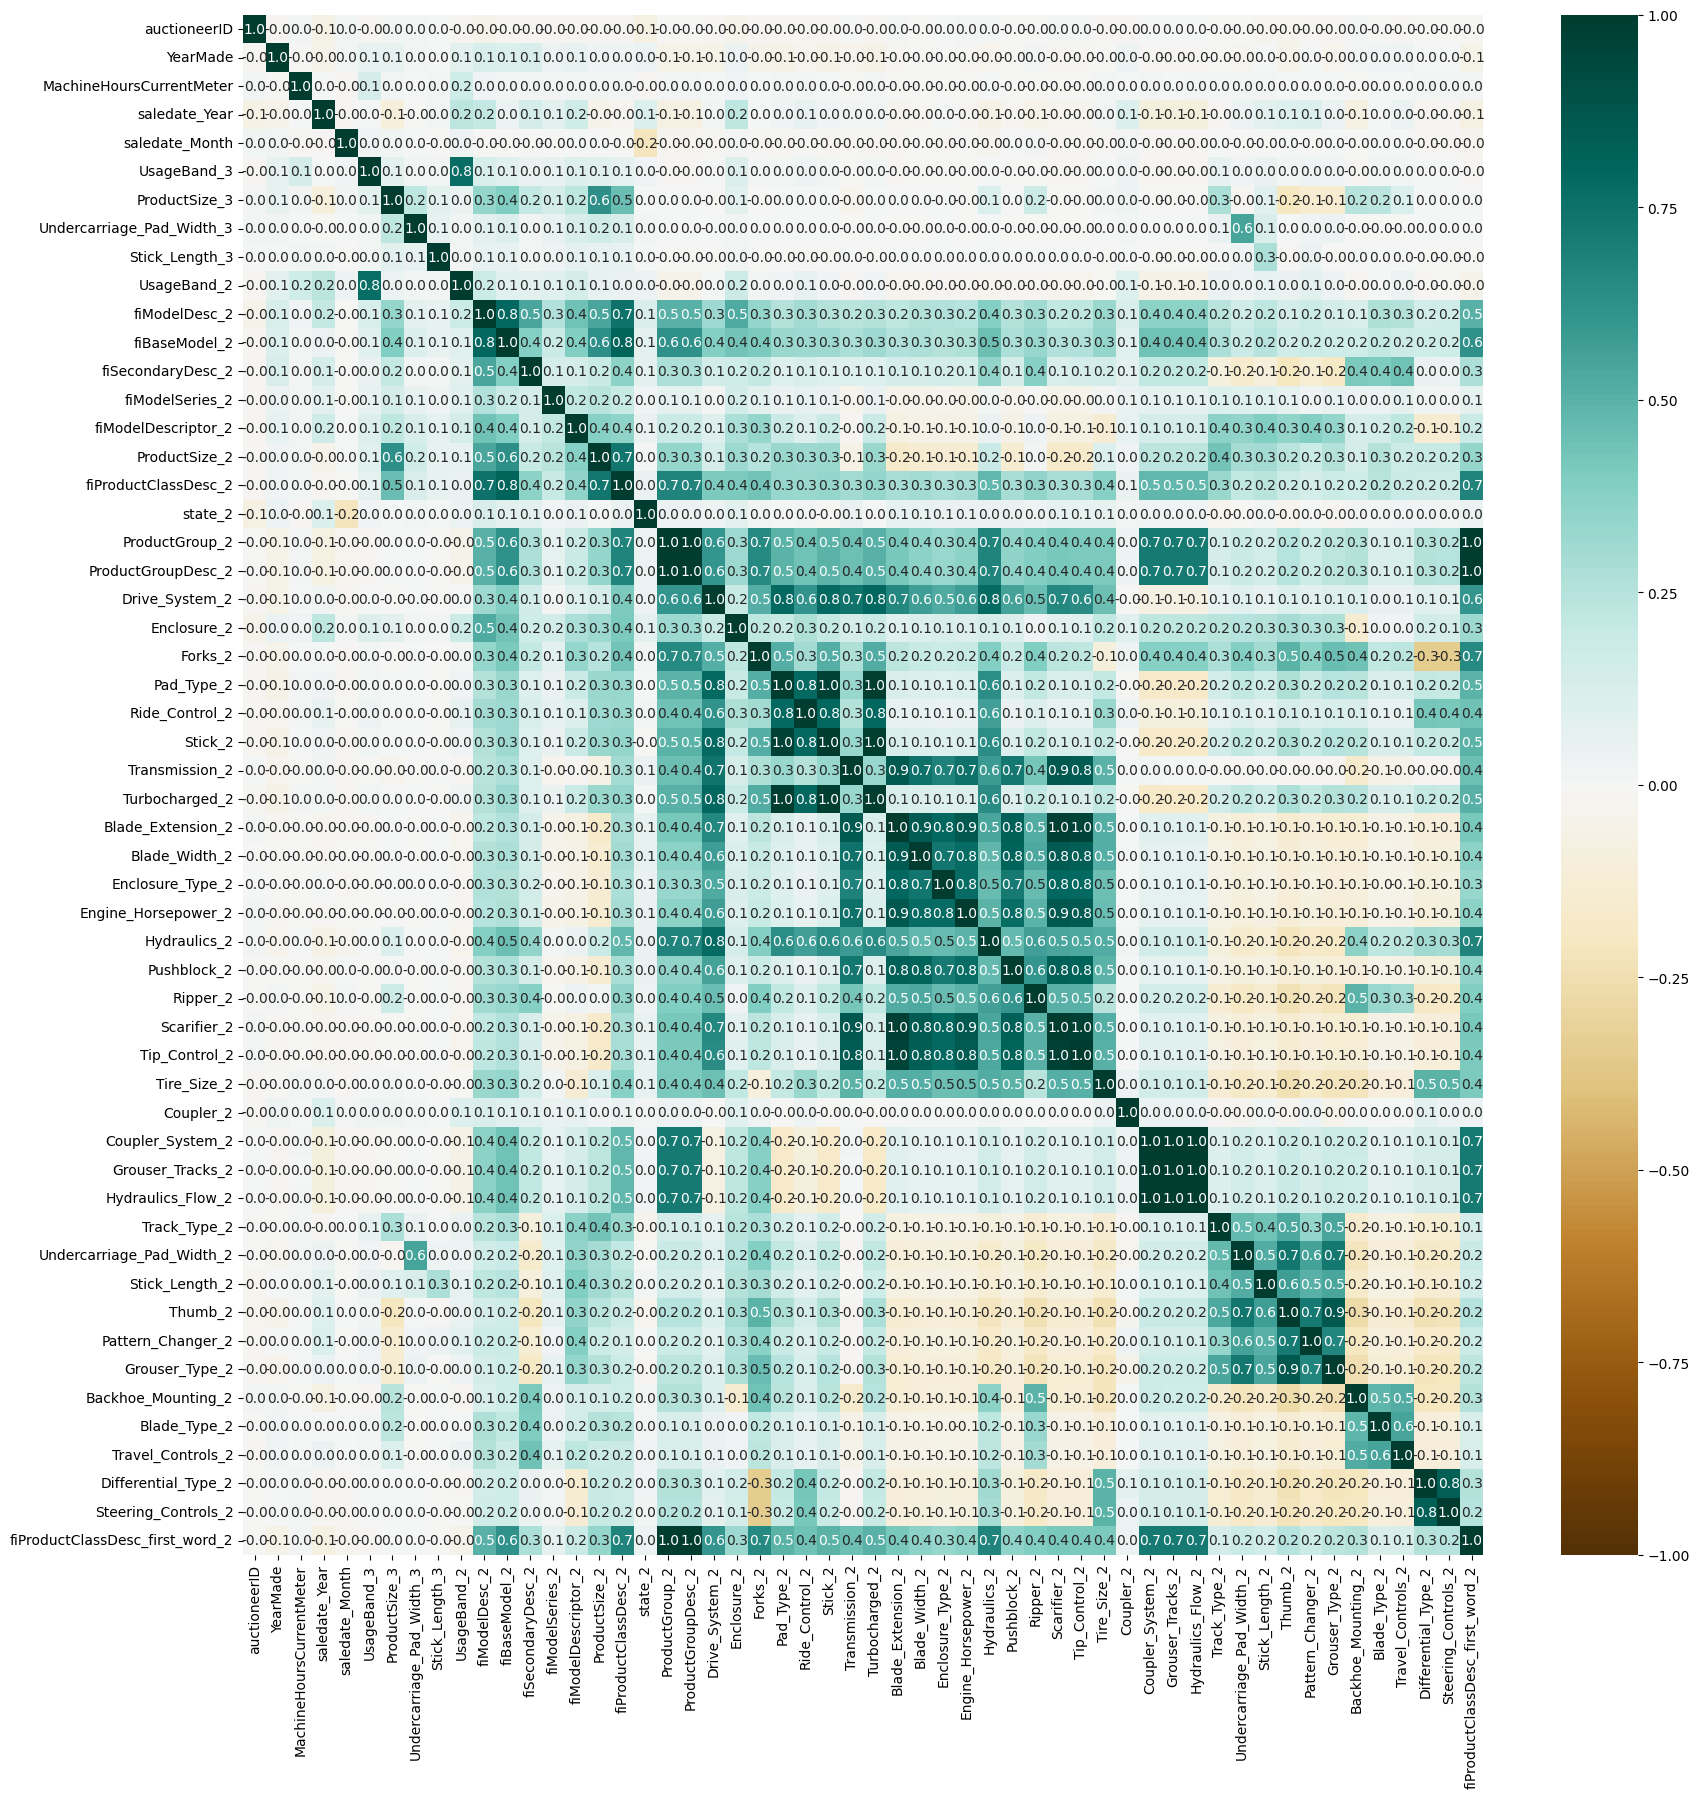

In [63]:
# plt.figure(figsize=(20, 20))
# sns.heatmap(X_train.corr(), vmin=-1, fmt=".1f", vmax=1, annot=True, cmap='BrBG')
# plt.show()

In [70]:
# %%time

# model = RandomForestRegressor(n_jobs=-1,
#                               n_estimators = 400,
#                               #max_depth = 10,
#                               #min_samples_leaf = 2,
#                               min_samples_split = 3,
#                               min_impurity_decrease = 0.1,
#                               random_state = 1579,
#                               max_features = 'sqrt'
#                               )
# model.fit(X_train, y_train)

# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# print(f'Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
# print(f'Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
# print(f'R²:' , r2_score(y_test, y_test_pred))
# print(f'Train MAE:', mean_absolute_error(y_train, y_train_pred))
# print(f'Test MAE:', mean_absolute_error(y_test, y_test_pred))


Train RMSE: 3439.7808350842747
Test RMSE: 7204.587194371606
R²: 0.9028597209286798
Train MAE: 2195.9908864943477
Test MAE: 4536.1906539465435
CPU times: user 11min 20s, sys: 6.5 s, total: 11min 26s
Wall time: 7min 29s


                              n_estimators = 500,
                              #max_depth = 10,
                              min_samples_leaf =2,                              
                              min_impurity_decrease = 5,
                              random_state = 1579,
                              max_features = 7

Train RMSE: 5424.064363521508
Test RMSE: 7528.221034310329
R²: 0.8939365213796718
Train MAE: 3554.404287468027
Test MAE: 4842.0784194650505
CPU times: user 11min 11s, sys: 4.48 s, total: 11min 15s
Wall time: 7min 46s
        
        
        
        
                              n_estimators = 500,
                              #max_depth = 10,
                              min_samples_leaf = 2,                            
                              min_impurity_decrease = 0.1,
                              random_state = 42,
                              max_features = 7
Train RMSE: 5335.234948793847
Test RMSE: 7503.297679143276
R²: 0.8946376384019723
Train MAE: 3454.4514511575794
Test MAE: 4803.58357104811
CPU times: user 10min 59s, sys: 3.7 s, total: 11min 2s
Wall time: 6min 55s

                              n_estimators = 500,
                              #max_depth = 10,
                              min_samples_leaf = 3,                            
                              min_impurity_decrease = 0.1,
                              random_state = 42,
                              max_features = 7
Train RMSE: 6179.925215580688
Test RMSE: 7741.035667306977
R²: 0.8878551640015854
Train MAE: 4013.430026621435
Test MAE: 4991.823152557887
CPU times: user 9min 59s, sys: 4.66 s, total: 10min 3s
Wall time: 6min 15s

                              n_estimators = 300,
                              #max_depth = 10,
                              min_samples_leaf = 3,                            
                              min_impurity_decrease = 10,
                              random_state = 42,
                              max_features = 6
Train RMSE: 6592.250056673659
Test RMSE: 7995.827395285105
R²: 0.8803513055519068
Train MAE: 4340.949567853815
Test MAE: 5206.9802407310535
CPU times: user 5min 9s, sys: 1.67 s, total: 5min 11s
Wall time: 3min 11s

                              n_estimators = 300,
                              #max_depth = 10,
                              min_impurity_decrease = 100,
                              random_state = 42,
                              max_features = 6                         
                                                           
Train RMSE: 4626.547888486479
Test RMSE: 7585.903834919565
R²: 0.8923049334374425
Train MAE: 3373.6481817608865
Test MAE: 4979.49803403697
CPU times: user 5min 31s, sys: 3.43 s, total: 5min 35s
Wall time: 3min 30s                         
                                                         
                              n_estimators = 300,
                              #max_depth = 10,
                              min_impurity_decrease = 0,
                              random_state = 42,
                              max_features = 6
Train RMSE: 2738.938471045535
Test RMSE: 7309.166073829745
R²: 0.9000191550681301
Train MAE: 1731.5073775323287
Test MAE: 4593.931985460746
CPU times: user 8min 23s, sys: 15.1 s, total: 8min 38s
Wall time: 5min 24s

# Testing Grid of parametrs

In [ ]:
# %%time
# param_grid = {
#     'max_features': [5, 6, 7],
#     'min_impurity_decrease': [5, 1000],
#     #'n_estimators': [100, 200, 300]
# }

# model = RandomForestRegressor(n_jobs=-1,
#                               n_estimators = 200,
#                               #max_depth = 10,
#                               #min_impurity_decrease = 10,
#                               random_state = 57,
#                               #max_features = 'sqrt'
#                               )
# model.fit(X_train, y_train)
# # metrics for GridSearchCV
# scoring = {
#     'MSE': make_scorer(mean_squared_error, greater_is_better=False),
#     'R2': make_scorer(r2_score),
#     'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
# }

# #  GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring=scoring, refit='R2', return_train_score=True)
# grid_search.fit(X_train, y_train)

# # Results on the grid
# results = grid_search.cv_results_

# # Print resalts
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

# for mean_mse, mean_r2, mean_mae, params in zip(results['mean_test_MSE'], results['mean_test_R2'], results['mean_test_MAE'], results['params']):
#     print(f"Params: {params} - Mean Test MSE: {mean_mse} - Mean Test R2: {mean_r2} - Mean Test MAE: {mean_mae}")

# # Лучшие параметры и модель по метрике R2
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# # Оценка лучшей модели на тестовом наборе
# y_test_pred = best_model.predict(X_test)
# test_mse = mean_squared_error(y_test, y_test_pred)
# test_r2 = r2_score(y_test, y_test_pred)
# test_mae = mean_absolute_error(y_test, y_test_pred)
# print(f"\nTest MSE of the Best Model: {test_mse:.2f}")
# print(f"Test R2 of the Best Model: {test_r2:.2f}")
# print(f"Test MAE of the Best Model: {test_mae:.2f}")

In [ ]:
### Feature importance
# pd.Series(
#     model.feature_importances_,
#     index=model.feature_names_in_
# ).sort_values(ascending=False)

# Prediction on the Validation datas

In [10]:
df2 = df
X_valid2 = df_valid

y = df2['SalePrice']
X = df2.drop(columns= ['SalePrice', 'MachineID', 'ModelID', 'SalesID', 'datasource'])
X_valid = X_valid2.drop(columns= ['MachineID', 'ModelID', 'SalesID', 'datasource'])

target_mean_dict, target_nan_mean_dict = make_target_mean_dict(X, y)
X = target_encode(X, target_mean_dict, target_nan_mean_dict)
X_valid = target_encode(X_valid, target_mean_dict, target_nan_mean_dict)

X = X.select_dtypes('number')
X_valid = X_valid.select_dtypes('number')

X = X.fillna(X.mean())
X_valid = X_valid.fillna(X.mean())

In [ ]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators = 600,
                              #max_depth = 12,
                              min_impurity_decrease = 0.1,
                              #min_samples_split = 3,
                              #random_state = 1579,
                              max_features = 8,
                              #max_samples=0.75
                              )
model.fit(X, y)

y_valid_pred = model.predict(X_valid)

In [14]:
# Create a submission file
submission = pd.DataFrame({'SalesID': df_valid['SalesID'], 'SalePrice': y_valid_pred})
submission.to_csv('final_submission.csv', index=False)

### not used

In [ ]:
# scaler = MinMaxScaler()  -   nothing to chenge
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
# X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

# feature_names = X_train.columns  is is aufully compicated
# imputer = SimpleImputer(strategy='mean')
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)
# X_valid = imputer.transform(X_valid)
# X_train = pd.DataFrame(X_train, columns=feature_names)
# X_test = pd.DataFrame(X_test, columns=feature_names)
# X_valid = pd.DataFrame(X_valid, columns=feature_names)

# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 20))
# sns.heatmap(X.corr(), vmin=-1, fmt=".1f", vmax=1, annot=True, cmap='BrBG')
# plt.show()